# DS2 - Multivariate Analysis

# Assignment 1: Factor Analysis (12 points)

The file `nevo_online_2019_nutrientgehaltes.csv` (NEVO-online version 2019/6.0, RIVM, Bilthoven) contains nutrient compositions of a large number of consumer products collected in 2019. 

Perform Factor Analysis on the nutrient data (not the first twelve columns). Assume there are three main underlying factors (components). Draw biplots of components 1 and 2 and of components 2 and 3.

Notes:

* The variables named F#somenumber_* denote fatty acids, where the number indicates the chain length.
* In the biplots, only draw lines/arrows for the 25 variables that are most associated with the selected eigenvectors, i.e. have the highest absolute values (loadings) on the components.


Consider and discuss the following aspects:

* Is it necessary to normalize the data?
* How many eigenvectors are required to capture the most significant features of the data?
* What is the interpretation of a principal/factor component in this context?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nevo = pd.read_csv("nevo_online_2019_nutrientgehaltes.csv", sep=";", decimal=',')

print(nevo.columns)
print(nevo.columns[12])
print(nevo.shape)

nevo.head()

Index(['Productgroepcode', 'Productgroep_oms', 'Productcode',
       'Product_omschrijving', 'Product_description', 'Product_synoniemen',
       'Meeteenheid', 'Hoeveelheid', 'Commentaarregel', 'Verrijkt_met',
       ...
       'VITK2_mug', 'THIA_mg', 'RIBF_mg', 'VITB6_mg', 'VITB12_mug', 'NIA_mg',
       'FOL_mug', 'FOLFD_mug', 'FOLAC_mug', 'VITC_mg'],
      dtype='object', length=144)
ENERCC_kcal
(2152, 144)


,Productgroepcode,Productgroep_oms,Productcode,Product_omschrijving,Product_description,Product_synoniemen,Meeteenheid,Hoeveelheid,Commentaarregel,Verrijkt_met,...,VITK2_mug,THIA_mg,RIBF_mg,VITB6_mg,VITB12_mug,NIA_mg,FOL_mug,FOLFD_mug,FOLAC_mug,VITC_mg
0,1,Aardappelen en knolgewassen,1,Aardappelen rauw,Potatoes raw,NaN,g,100,Per 100g.,NaN,...,NaN,0.12,0.04,0.30,0.00,1.2,23.0,23.0,0.0,14.0
1,1,Aardappelen en knolgewassen,2,Aardappelen nieuwe rauw,Potatoes new raw,NaN,g,100,Per 100g.,NaN,...,NaN,0.12,0.04,0.30,0.00,1.2,23.0,23.0,0.0,25.0
2,1,Aardappelen en knolgewassen,3,Aardappelen oude rauw,Potatoes old raw,NaN,g,100,Per 100g.,NaN,...,NaN,0.12,0.04,0.22,0.00,1.2,23.0,23.0,0.0,5.0
3,1,Aardappelen en knolgewassen,121,Aardappelpuree vers bereid m hv melk m marg,Potatoes mashed fresh prep w semi-sk milk+marg,NaN,g,100,Per 100g. Voor meer informatie zie Overzicht r...,NaN,...,0.1,0.06,0.06,0.15,0.12,0.8,14.5,14.5,0.0,7.0
4,1,Aardappelen en knolgewassen,667,Cassave rauw,Cassava raw,Maniokwortel rauw,g,100,Per 100g.,NaN,...,NaN,0.06,0.02,0.30,0.00,0.5,19.0,19.0,0.0,31.0


In [4]:
# Normalization is necessary, because the data are heterogenuous and quite heteroscedastic.
nutrients = np.array(nevo.iloc[:, 13:].replace(np.nan, 0).values, dtype=float)
std = np.std(nutrients, axis=0)
std[std == 0] = 1
nutrients /= std

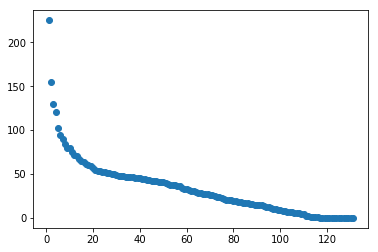

In [5]:
# Using the SVD+varimax here, but anything that does PCA with factor rotation is good.
U, L, V = np.linalg.svd(nutrients)

plt.scatter(range(1, L.size+1), L)
plt.show()

The break in the scree plot suggests that there are 4 significant principal components. The assignment asks for three, so three it is:

In [6]:
def varimax(components, gamma=1, maxiter=20, tol=1e-8):
    """Perform VariMax (gamma=1) or OrthoMax (gamma=0) rotation on components"""
    p,k = components.shape
    R   = np.eye(k)
    f   = float(gamma)/p
    d   = 0
    for i in range(maxiter):
        d_old = d
        L = np.dot(components, R)
        A = L**3 - f * (L*(L**2).sum(axis=0))**2
        U,s,V = np.linalg.svd(np.dot(components.T,A))
        R = np.dot(U,V)
        d = sum(s)
        if (d - d_old)**2 < tol: 
            break
    return np.dot(components, R)

In [9]:
Q = varimax(V.T[:, :3])
Z = nutrients @ Q

attributes = nevo.columns[13:]
print(*attributes)

PROT_g PROTPL_g PROTAN_g NT_g CHO_g SUGAR_g STARCH_g POLYL_g FIBT_g ALC_g WATER_g OA_g FAT_g FACID_g FASAT_g FAMSCIS_g FAPU_g FAPUN3_g FAPUN6_g FATRS_g F4_0_g F6_0_g F8_0_g F10_0_g F11_0_g F12_0_g F13_0_g F14_0_g F15_0_g F16_0_g F17_0_g F18_0_g F19_0_g F20_0_g F21_0_g F22_0_g F23_0_g F24_0_g F25_0_g F26_0_g FASATXR_g F10_1CIS_g F12_1CIS_g F14_1CIS_g F16_1CIS_g F18_1CIS_g F20_1CIS_g F22_1CIS_g F24_1CIS_g FAMSCXR_g F18_2CN6_g F18_2CN9_g F18_2CT_g F18_2TC_g F18_2R_g F18_3CN3_g F18_3CN6_g F18_4CN3_g F20_2CN6_g F20_3CN9_g F20_3CN6_g F20_3CN3_g F20_4CN6_g F20_4CN3_g F20_5CN3_g F21_5CN3_g F22_2CN6_g F22_2CN3_g F22_3CN3_g F22_4CN6_g F22_5CN6_g F22_5CN3_g F22_6CN3_g F24_2CN6_g FAPUXR_g F10_1TRS_g F12_1TRS_g F14_1TRS_g F16_1TRS_g F18_1TRS_g F18_2TTN6_g F18_3TTTN3_g F20_1TRS_g F20_2TT_g F22_1TRS_g F24_1TRS_g FAMSTXR_g FAUN_g CHORL_mg NA_mg K_mg CA_mg P_mg MG_mg FE_mg HAEM_mg NHAEM_mg CU_mg SE_mug ZN_mg ID_mug ASH_g VITA_RAE_mug VITA_RE_mug RETOL_mug CARTBTOT_mug CARTA_mug LUTN_mug ZEA_mug CRYPXB_

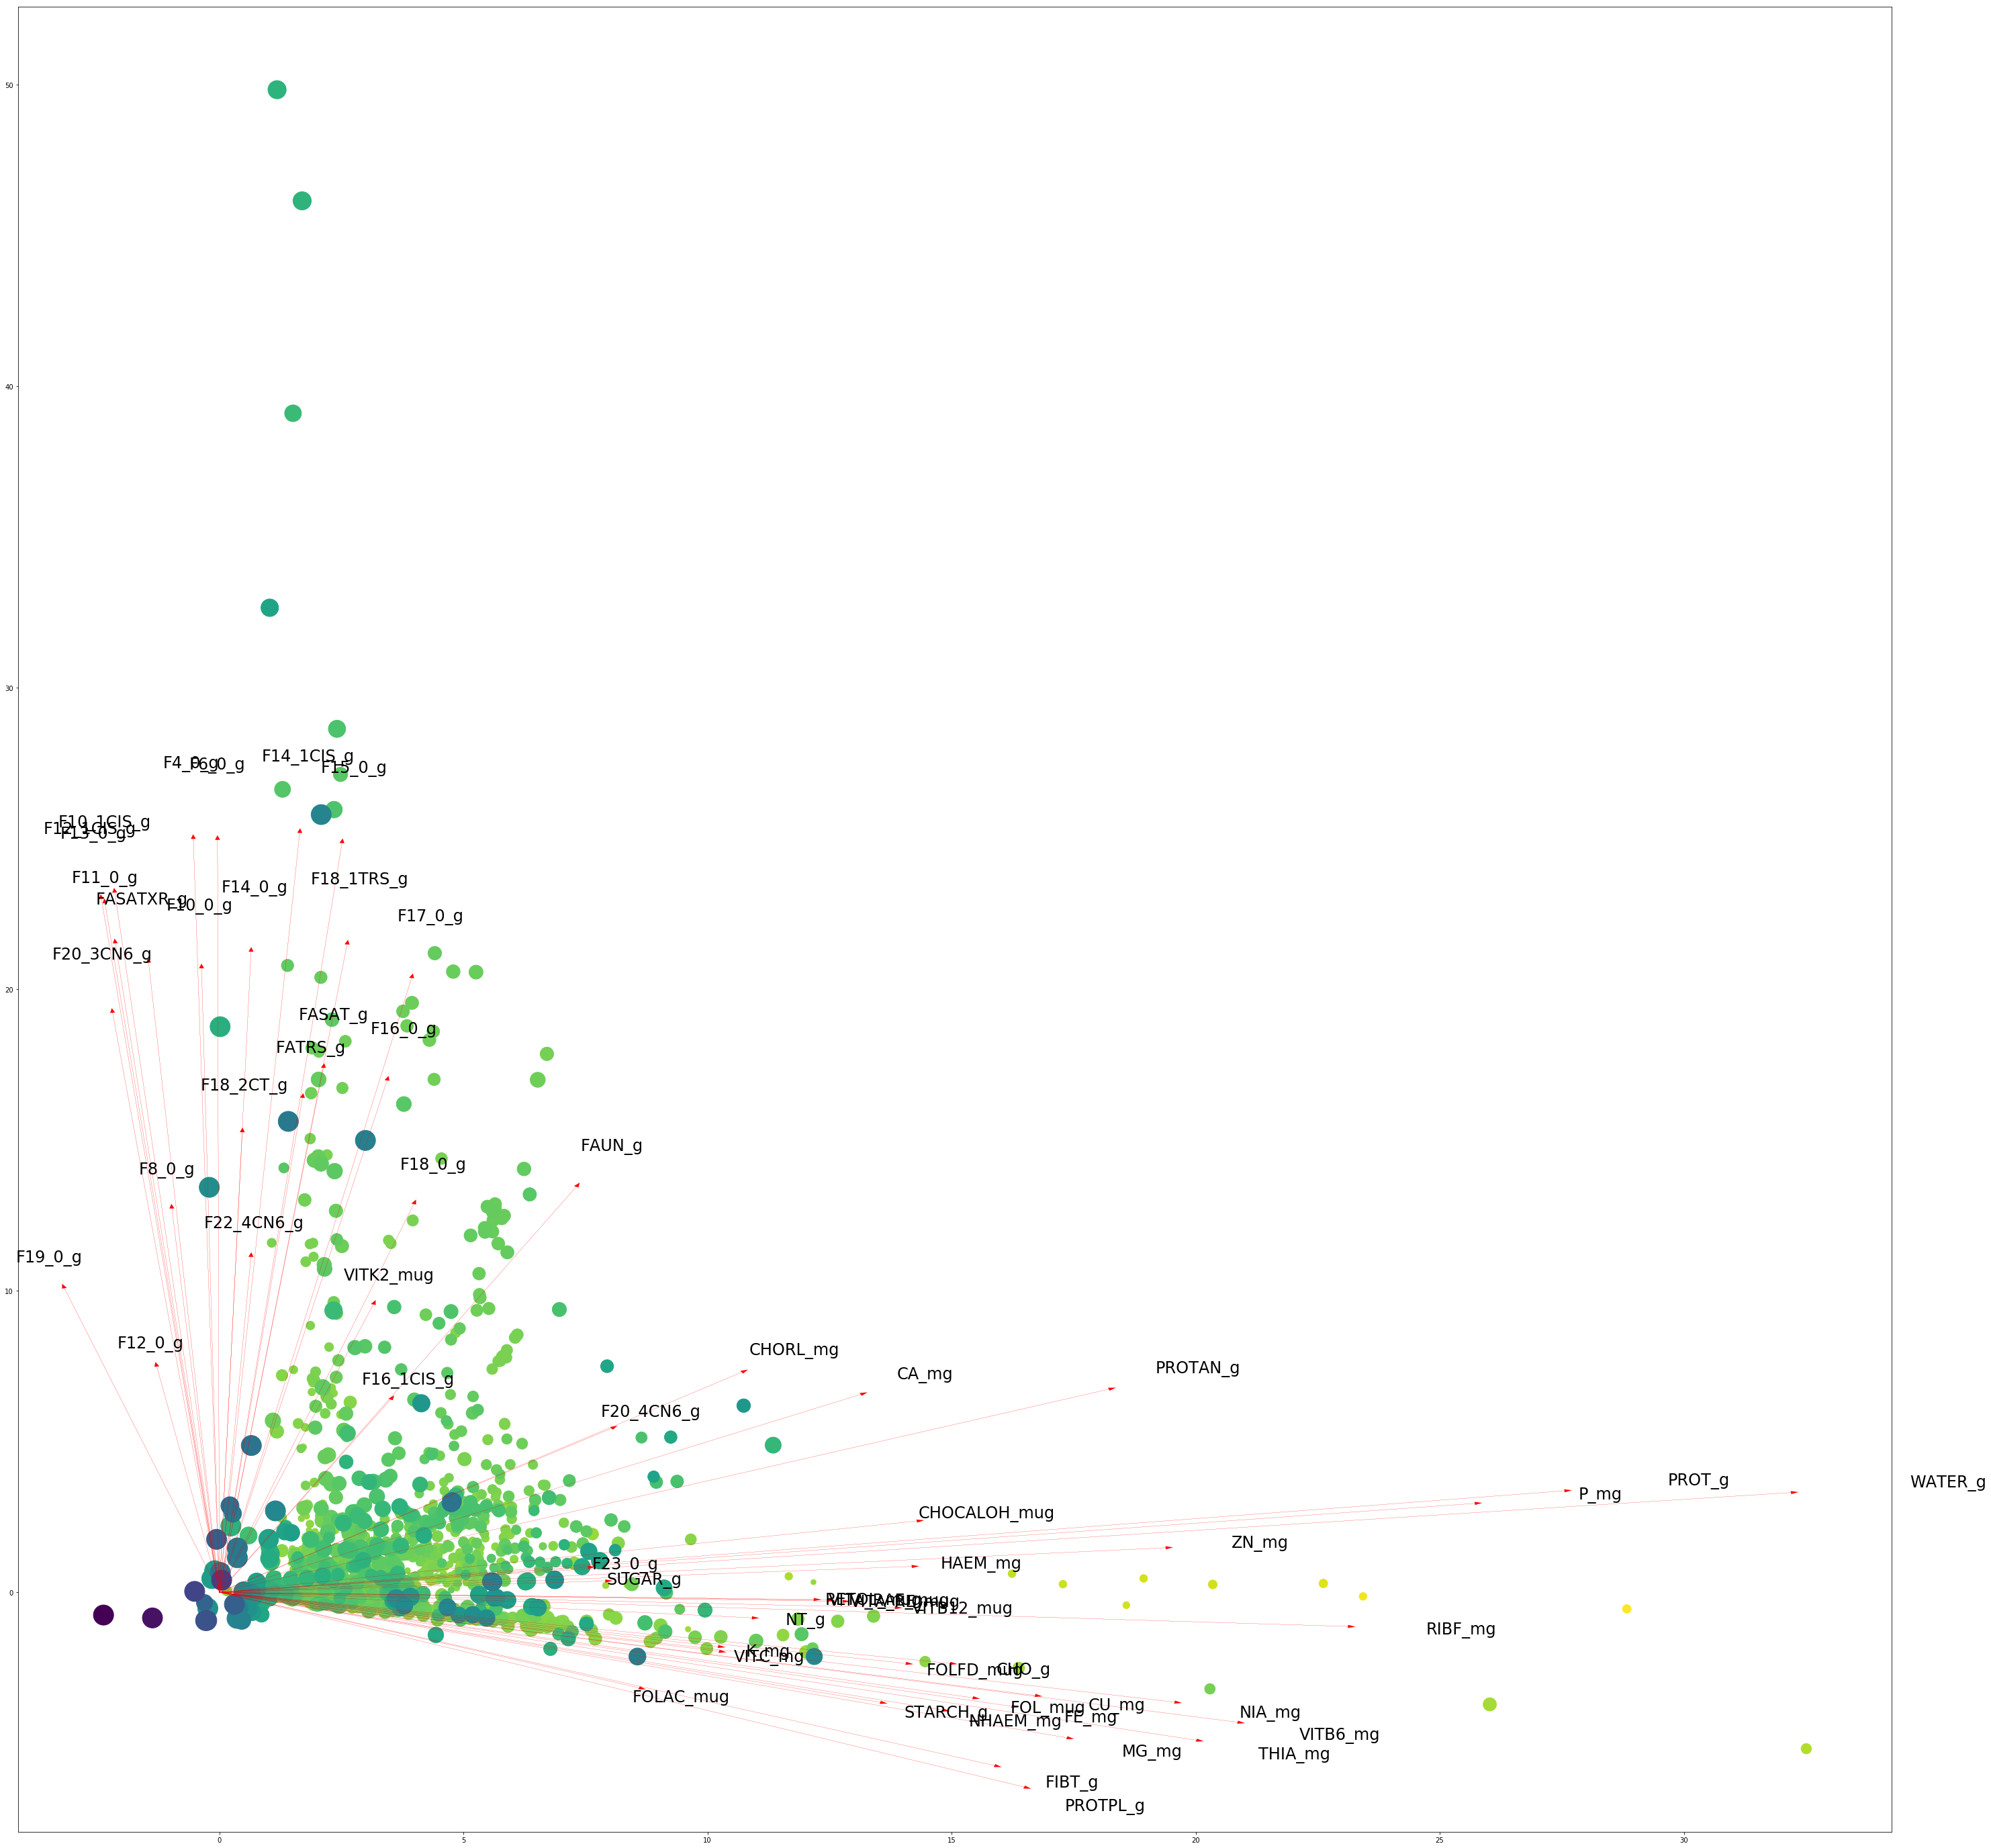

In [11]:
xorder = Z[:, 0].argsort()[::-1]
yorder = Z[:, 1].argsort()[::-1]
zorder = Z[:, 2].argsort()[::-1]

plt.figure(figsize=(50,50))
plt.scatter(-Z[zorder, 0], Z[zorder, 1], c=Z[zorder,2], s=(nevo["ENERCC_kcal"][zorder]))
for (x, y), n in zip(Q[:, :2], attributes):
    if x**2 + y**2 > 0.005:
        plt.arrow(0, 0, -100*x, 100*y, head_width=0.1, lw=0.1, color="red")
        plt.text(-110*x, 110*y, n, horizontalalignment="center", verticalalignment="center", fontsize=24)
plt.show()

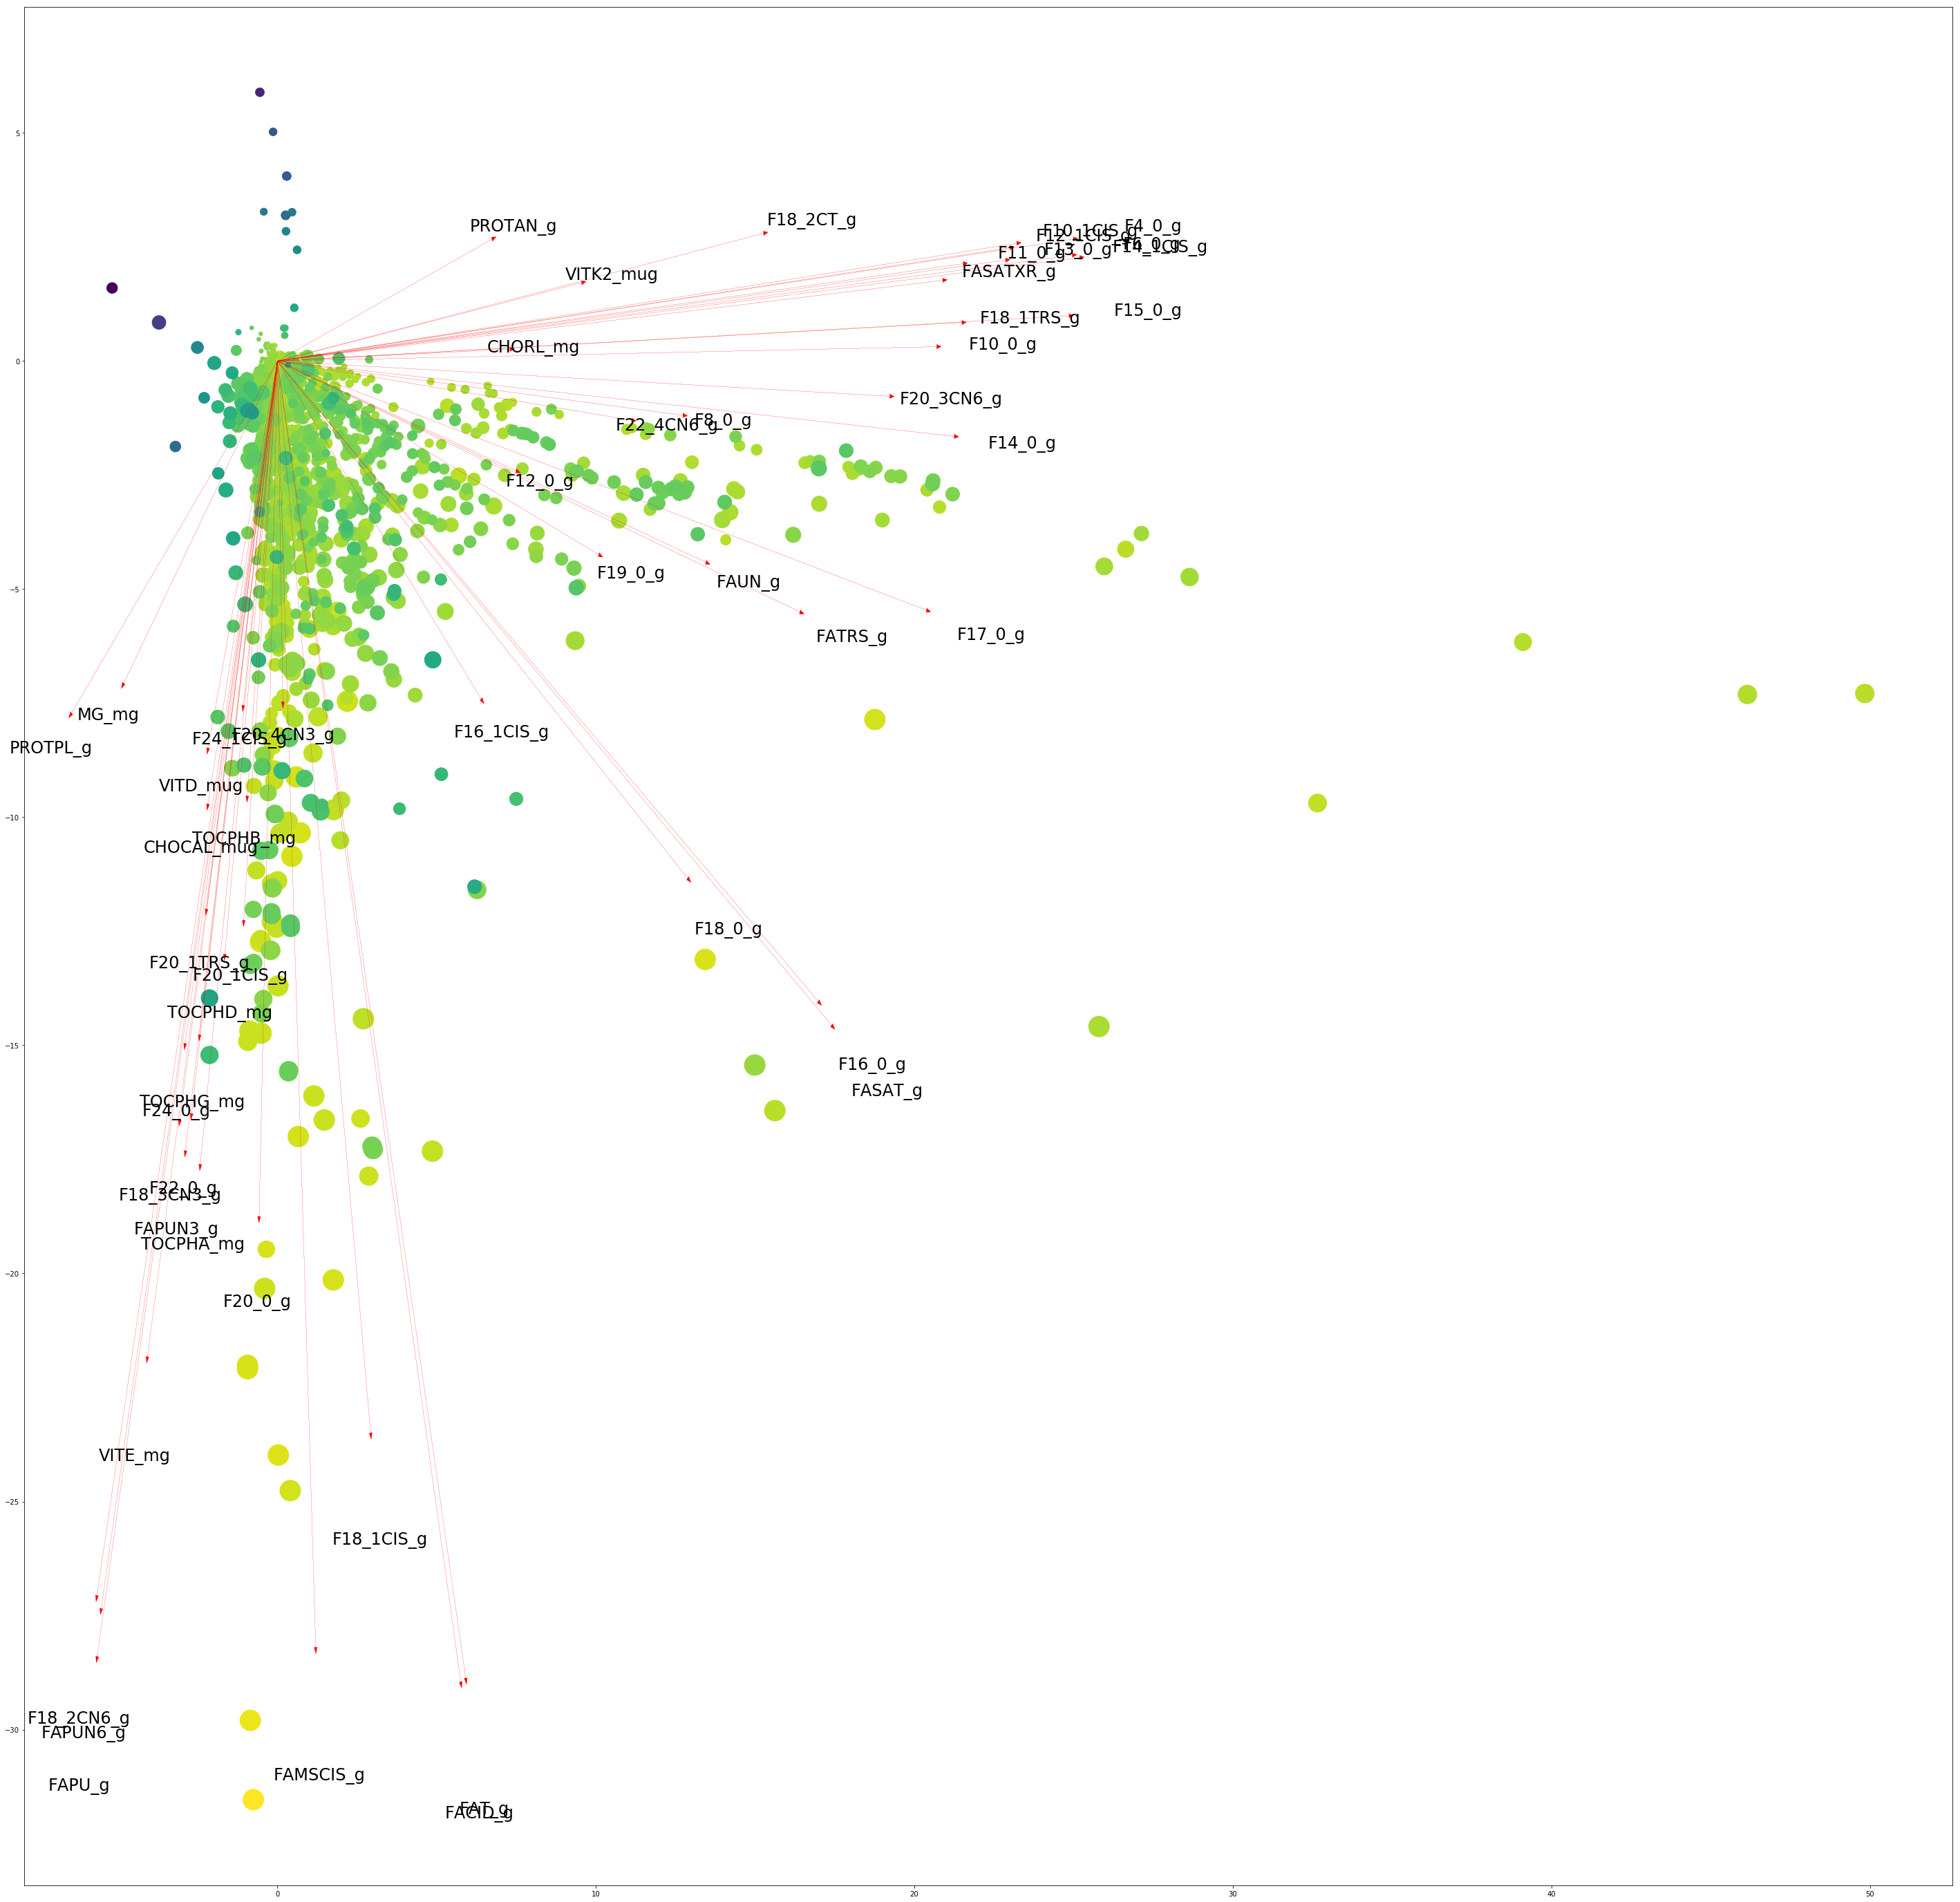

In [14]:
plt.figure(figsize=(50,50))
plt.scatter(Z[xorder, 1], Z[xorder, 2], c=Z[xorder,0], s=(nevo["ENERCC_kcal"][xorder]))
for (x, y, z), n in zip(Q[:, :3], attributes):
    if y**2 + z**2 > 0.005:
        plt.arrow(0, 0, 100*y, 100*z, head_width=0.1, lw=0.1, color="red")
        plt.text(110*y, 110*z, n, horizontalalignment="center", verticalalignment="center", fontsize=24)
plt.show()

A component in this context is a 'composition fingerprint', showing correlated nutrients. The first plot shows that the first component is associated with proteins, carbohydrates (starch) and minerals and vitamins. The second component is associated with fatty acids. Interestingly, the second plot shows that the third component is also associated with fatty acids, but complementary to the second one. The second component seems more related to fully (unhealthy) saturated fatty acids, while the third component is related to unsaturated (healthier) fatty acids.

# Assignment 2: Multidimensional Scaling (8 points)

The file `SARS-nCov2-distance-matrix.dat` contains a distance matrix based on all pairwise alignment scores of the currently available DNA sequences of SARS-nCov2. Perform multidimensional scaling and make a plot of the principal coordinates. 

Consider and discuss the following aspects:

* How many significant principal coordinates are there and what does that mean?
* What does the plot show?
* What is the relation with principal components and is it possible to do principal component analysis directly on alignment data?

In [12]:
distmat = np.loadtxt('SARS-Cov2-distance-matrix.dat.zip')

m = distmat.mean(axis=1)
A = -0.5 * (distmat - m - m[:, None] + m.mean())

vals, vecs = np.linalg.eigh(A)

order = vals.argsort()[::-1]

plt.scatter(range(1, len(vals)+1), vals[order])
plt.show()

X = vecs[:, order[:4]] * vals[order[:4]]**0.5

plt.scatter(X[:, 0], X[:, 1], c=X[:, 2])
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 10: invalid start byte

In [10]:
%ls

200416-DS2-A-Multivariate-Analysis.ipynb
200416-DS2-T-Multivariate-Analysis.ipynb
SARS-Cov2-distance-matrix.dat
SARS-Cov2-distance-matrix.dat.zip
nevo_online_2019_nutrientgehaltes.csv


The scree plot shows there are four significant coordinates, based on the break between the fourth and the fifth.

The scatterplot shows the distribution of the viruses (observations) in a Cartesian 'sequence space' in a way that the Euclidean distances between the observations correspond as good as possible with the distances based on the alignment scores. The distribution suggests that in the sequences used the differences are pretty much diffusive, i.e. due to random mutations.

In principle, principal coordinates correspond to the scores obtained from a principal component analysis, provided that the observations are real-valued and direct measurements (not relational, like distances). Alignments can only be made between pairs of structures, so it is not possible to perform PCA on such data. This is aggravated by the possibility of insertions and deletions. However, it is possible to build a pairwise alignment score matrix, which can be transformed into a dissimilarity matrix, which can be used for principal coordinate analysis. This allows embedding the data points in a Cartesian space, which correspond to (fictive) component/factor scores.